# Scikit learn introduction
**Steps:**
0. An end-to-end Scikit-Learn workflow.
1. Getting the data ready.
2. Choose the right estimator / algorithm for our probelms .
3. Fit the model / algorithm and use it to make predictions on our data.
4. Evaluating a model.
5. Improve the model.
6. Save and load the trained model.
7. Putting it all together!

In [1]:
steps = [
"0. An end-to-end Scikit-Learn workflow.",
"1. Getting the data ready.",
"2. Choose the right estimator / algorithm for our probelms .",
"3. Fit the model / algorithm and use it to make predictions on our data.",
"4. Evaluating a model.",
"5. Improve the model.",
"6. Save and load the trained model.",
"7. Putting it all together!"
        ]

In [2]:
steps

['0. An end-to-end Scikit-Learn workflow.',
 '1. Getting the data ready.',
 '2. Choose the right estimator / algorithm for our probelms .',
 '3. Fit the model / algorithm and use it to make predictions on our data.',
 '4. Evaluating a model.',
 '5. Improve the model.',
 '6. Save and load the trained model.',
 '7. Putting it all together!']

## 0. An end-to-end Scikit-learn workflow

In [3]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot

In [4]:
# 1.Getting the data ready 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# Create x(feature matrix)
x = heart_disease.drop('target', axis=1)
# Create y(labels)
y = heart_disease['target']

In [6]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [8]:
# 2nd way to get rid of warnings
# import warnings
# warnings.filterwarnings('ignore')

In [9]:
# 2.Choose the right model hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # clf = classification model
# we'll keep the deafault hyperparameters
clf.get_params() # to get the paramters of clf

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3.Fit the model to the training data 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# for fix the warnings we can use 2 ways
# 1- n_estemators=100
# 2- import warnings
# warnings.filterwarnigs('ignore') or warning.filterwarnings('default') to get back

In [11]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [12]:
# Make a prediction
# y_label = clf.predict(np.array([1, 2, 3, 4])) ==> Error
# Shape of array doesn't fit

In [13]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2


In [14]:
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

In [15]:
y_test.head()

62     1
254    0
118    1
104    1
65     1
Name: target, dtype: int64

In [16]:
# 4. Evaluate the model on the trainig data and test data
clf.score(x_train, y_train), clf.score(x_test, y_test)

(1.0, 0.819672131147541)

In [17]:
# See the accuracy more details
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

           0       0.89      0.75      0.81        32
           1       0.76      0.90      0.83        29

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



In [18]:
print(confusion_matrix(y_test, y_preds))

[[24  8]
 [ 3 26]]


In [19]:
print(accuracy_score(y_test, y_preds))

0.819672131147541


In [20]:
# 5.Improve the model
# Try diffrent amount of n_estimator
best_score = 0

for i in range(10, 100, 5):
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Trying model with {i} estimators ...")
    print(f"The model accuracy on the test set:{clf.score(x_test, y_test) * 100: .2f}%")
    
    if clf.score(x_test, y_test) > best_score:
        best_clf = clf
        best_score = clf.score(x_test, y_test)

print(f'The best score is ==> {best_score}')

Trying model with 10 estimators ...
The model accuracy on the test set: 85.25%
Trying model with 15 estimators ...
The model accuracy on the test set: 81.97%
Trying model with 20 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 25 estimators ...
The model accuracy on the test set: 77.05%
Trying model with 30 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 35 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 40 estimators ...
The model accuracy on the test set: 85.25%
Trying model with 45 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 50 estimators ...
The model accuracy on the test set: 80.33%
Trying model with 55 estimators ...
The model accuracy on the test set: 85.25%
Trying model with 60 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 65 estimators ...
The model accuracy on the test set: 83.61%
Trying model with 70 estimators ...
The model accura

In [21]:
best_clf.score(x_test, y_test)

0.8524590163934426

In [22]:
# 6. Save the model and reload it 
import pickle
pickle.dump(best_clf, open('Random_forest_model_1.pkl', 'wb'))


In [23]:
# Load it 
loaded_model = pickle.load(open('Random_forest_model_1.pkl', 'rb'))
loaded_model.score(x_test, y_test)

0.8524590163934426

In [24]:
# To see the version of sklearn
import sklearn
sklearn.show_versions()


System:
    python: 3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 21:14:29)  [GCC 7.3.0]
executable: /home/ali/workspace/Machine-learning/env/bin/python
   machine: Linux-5.4.0-kali4-amd64-x86_64-with-debian-kali-rolling

Python dependencies:
       pip: 20.0.2
setuptools: 46.0.0.post20200309
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.2
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [25]:
steps[0] = '0. An end-to-end Scikit-Learn workflow [x]'

## 1. Getting the data ready

Three main things we have to do:

1. Split the data into features and labels (usually `X` & `y`)
2. Filling (also called imputing) or disregarding missing values
3. Converting non-numerical values to numerical values (also called feature encoding)

In [26]:
# split data for x and y
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

In [27]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [28]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [29]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [30]:
# Show the shapes of our train data and test data 
x_train.shape, x_test.shape, y_test.shape, y_train.shape

((242, 13), (61, 13), (61,), (242,))

In [31]:
# shape of all the data x = x_test + x_train
x.shape 

(303, 13)

### 1.1 Make sure all the data is numerical

In [32]:
# import the data
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [33]:
# see the type of our data and see the size of it
car_sales.dtypes, len(car_sales)

(Make             object
 Colour           object
 Odometer (KM)     int64
 Doors             int64
 Price             int64
 dtype: object,
 1000)

In [34]:
# Split the data to x, y
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']

In [35]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
y.tail()

995    32042
996     5716
997    31570
998     4001
999    12732
Name: Price, dtype: int64

In [37]:
# Split to training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
x_train.shape, x_test.shape

((800, 4), (200, 4))

In [39]:
# Build machine learning model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
# model.fit(x_train, y_train)
# model.score(x_test, y_test)
# Error ==> cann't convert string data to float

In [40]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot' ,one_hot, categorical_features)],
                                remainder='passthrough')
transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [41]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [42]:
pd.DataFrame(transformed_x).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0


In [43]:
dumies = pd.get_dummies(car_sales[['Make','Colour', 'Doors']])
dumies.head()

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0


In [44]:
# Refit the model 
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
model.score(x_test, y_test)

0.3362899219458084

### 1.2 What if there were missing values?
1. Fill them with some value(also known as imputation)
2. Remove the sample with missing data together.

In [46]:
# import car sales missing data
car_sales_missing_data = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing_data.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [47]:
# show how many data is missed
car_sales_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [48]:
# Option 1: Fill missing data with pandas
# fill make
car_sales_missing_data['Make'].fillna('missing', inplace=True)
# fill the colour
car_sales_missing_data['Colour'].fillna('missing', inplace=True)
# fill the Odometer (KM)
car_sales_missing_data['Odometer (KM)'].fillna(car_sales_missing_data['Odometer (KM)'].mean(),
                                              inplace=True)
# fill the doors 
car_sales_missing_data['Doors'].fillna(4, inplace=True)

In [49]:
# remove the rows with missing values
car_sales_missing_data.dropna(inplace=True)

In [50]:
car_sales_missing_data.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing_data)

950

In [52]:
x = car_sales_missing_data.drop('Price', axis=1)
y = car_sales_missing_data['Price']

In [53]:
# convert our data to the numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot' ,one_hot, categorical_features)],
                                remainder='passthrough')
transformed_x = transformer.fit_transform(car_sales_missing_data)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [54]:
# Option 2: Fill missing values with scikit-learn


In [55]:
missing_car_sales = pd.read_csv('car-sales-extended-missing-data.csv')
missing_car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [56]:
missing_car_sales.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [57]:
# drop the none value of price
missing_car_sales.dropna(subset=['Price'], inplace=True)
missing_car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [58]:
# split to x, y
x = missing_car_sales.drop('Price', axis=1)
y = missing_car_sales['Price']

In [59]:
# Split data into train and test
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
# Fill missing values with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with missing and numerical values with means
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_feature = ['Make', 'Colour']
door_feature = ['Doors']
num_feature = ['Odometer (KM)']

# Create an imputer
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_feature),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_feature)
])

# Fill train and test values separately
filled_x_test = imputer.fit_transform(x_test) 
filled_x_train = imputer.fit_transform(x_train)

filled_x_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [61]:
# Get our transformed data array's back into DataFrame's
train_filled_car_sales = pd.DataFrame(filled_x_train,
                                     columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
test_filled_car_sales = pd.DataFrame(filled_x_test,
                                    columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

# Check missing data in training set
train_filled_car_sales.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [62]:
# Check to see the original... still missing values
missing_car_sales.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [63]:
# Convert all the data to numerical
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features = ['Make','Colour' ,'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([
    ('one_hot', one_hot, categorical_features)
], remainder='passthrough')

# Fill train and test values separately
transformed_x_train = transformer.fit_transform(train_filled_car_sales)
transormed_x_test = transformer.fit_transform(test_filled_car_sales)

# Check transformed and filled x_train
transformed_x_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [64]:
# Fit the machine learning model 
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

model = RandomForestRegressor()
model.fit(transformed_x_train, y_train)
model.score(transormed_x_test, y_test)

0.25366332156443805

In [65]:
# check the length of fill data
transformed_x_train.shape[0] + transormed_x_test.shape[0], len(car_sales)

(950, 1000)

In [66]:
steps[1] = '1. Getting the data ready  [x]'

## 2. Choosing the right estimator/algorithm for our problem

##### Scikit-Learn uses estimator as another term for machine learning model or algorithm.

* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number


### 2.1 Picking a machine learning model for regression problem

In [67]:
# import boston house data sets
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [68]:
# convert dictionary to dataframe
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [69]:
# How many samples
len(boston_df)

506

In [70]:
# Redge regression model
from sklearn.linear_model import Ridge

# setup a random seed
np.random.seed(42)

# create the data 
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# split into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(x, y)

# Check the score of ridge model on test data
model.score(x_test, y_test)

0.699377684877882

How to improve this score

What if ridge isn't working

Let's use the map again ...
![map](mahcine_learning_map.png)

In [71]:
# Try the random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(80)

# create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)
# evaluate the score
model.score(x_test, y_test)

0.8843572051953603

### 2.2 Choosing as estimator for classification problem

In [72]:
# import the data 
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [73]:
# size of our data
len(heart_disease)

303

In [74]:
from sklearn.svm import LinearSVC

# setup the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use our model
model = LinearSVC(max_iter=76000, dual=False)
model.fit(x_train, y_train)

# evaluate the score
model.score(x_test, y_test)

0.8524590163934426

In [75]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [76]:
# use RandomForestClassification
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model 
model = RandomForestClassifier()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.8852459016393442

Tidbit:

1. If you have structured data, used ensemble methods
2. If you have unstructured data, use deep learning or transfer learning



In [77]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [78]:
steps[2] ='2. Choose the right estimator / algorithm for our probelms [x]'

## 3. Fit the model/algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

##### Different names for:
 * X = features, features variables, data
 * y = labels, targets, target variables


In [79]:
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(80)

# make the data 
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model 
model = RandomForestClassifier()

# fit our data to the model (training the machine learning model)
model.fit(x_train, y_train)

# Use the pattern the machine has learned
model.score(x_test, y_test)

0.8852459016393442

### 3.2 Make prediction using a machine learning model

##### 2 way to make predictions:
1. 'predict()'
2. 'predict_proba'

In [80]:
# make predictioin with predict()

In [81]:
# model.predict([1, 2, 3, 4 ,5])
# error wrong data shape

In [82]:
x_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
23,61,1,2,150,243,1,1,137,1,1.0,1,0,2
261,52,1,0,112,230,0,1,160,0,0.0,2,1,2
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3


In [83]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [84]:
np.array([y_test])

array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

In [85]:
# compare prediction to truth labels to evaluate the model
np.mean(y_pred == y_test)

0.8852459016393442

In [86]:
model.score(x_test, y_test)

0.8852459016393442

In [87]:
# or use metric
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8852459016393442

In [88]:
# make prediction with predict_proba() --> probabilities

In [89]:
model.predict_proba(x_test[:5])

array([[0.61, 0.39],
       [0.61, 0.39],
       [0.72, 0.28],
       [0.91, 0.09],
       [0.38, 0.62]])

In [90]:
# predict the same data
model.predict(x_test[:5])

array([0, 0, 0, 0, 1])

In [91]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
from sklearn.ensemble import RandomForestRegressor

# setup the random seed
np.random.seed(80)

# Create the data
x = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# use the model
model = RandomForestRegressor()

# fit the data to the model
model.fit(x_train, y_train)

# make prediction
y_preds = model.predict(x_test)

# evaluate the score of our model
model.score(x_test, y_test)

0.8843572051953603

In [93]:
y_preds[:10]

array([21.626, 41.229, 22.752, 20.144, 25.863, 35.022, 45.342, 22.976,
       22.17 , 22.862])

In [94]:
np.array(y_test[:10])

array([20.8, 43.1, 24. , 16.1, 22.4, 37.3, 48.8, 22.8, 20.6, 23.3])

In [95]:
# compare prediction to the truth 
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

1.9292745098039212

In [96]:
steps[3] = '3. Fit the model / algorithm and use it to make predictions on our data [x]'

## 4. Evaluating a machine learning model

Three ways to evaluate Scikit-Learn models/esitmators:

    1. Estimator score method
    2. The scoring parameter
    3. Problem-specific metric functions.



### 4.1 Evaluating a model with the score method

In [97]:
# classification

# import randomforest classification
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed(80)
np.random.seed(80)

# Create x, y in heart disease case
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split to test and train ==> test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the data to the model 
model.fit(x_train, y_train)
# Option 1: check the score of our model
model.score(x_test, y_test)


0.8852459016393442

In [98]:
# Regression

# import randomforest regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(80)

# create x, y in boston_df case
x = boston_df.drop("target", axis=1)
y = boston_df['target']

# split to test and train ==> test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Instantiate the model and fit the data to the model
model = RandomForestRegressor()
model.fit(x_train, y_train)
# Check the score of model
model.score(x_test, y_test)

0.8655674723725941

### 4.2 Evaluating a model using the scoring parameter

In [99]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# classification

# import randomforest classification
from sklearn.ensemble import RandomForestClassifier 

# Setup random seed(80)
np.random.seed(80)

# Create x, y in heart disease case
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split to test and train ==> test size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate the model
model = RandomForestClassifier()

# Fit the data to the model 
model.fit(x_train, y_train)
# Option 1: check the score of our model
model.score(x_test, y_test)


0.8852459016393442

In [108]:
# use cross_val_score
cross_val_score(model, x, y, cv=10)

array([0.87096774, 0.80645161, 0.83870968, 0.93333333, 0.86666667,
       0.8       , 0.7       , 0.83333333, 0.73333333, 0.83333333])

In [110]:
# setup random seed()
np.random.seed(80)

# single training and test split
single_model_score = model.score(x_test, y_test)

# take the mean of 5 fold cross validation score 
score_multi = np.mean(cross_val_score(model, x, y, cv=5))

# compare single and cross validation
single_model_score, score_multi

(0.8852459016393442, 0.8149180327868851)

In [111]:
# in this case we use cross_val_score beacause the model trained through all the data and 
# data splits to N part and train through these N part 


#### 4.2.1 Classification model evaluation metrics

   1. Accuracy
   2. Area under ROC curve
   3. Confusion matrix
   4. Classification report


**accuracy**

In [113]:
# import cross_val_score
from sklearn.model_selection import cross_val_score

# import random forest classifier
from sklearn.ensemble import RandomForestClassifier

# setup random seed 
np.random.seed(80)

# create x, y ==> heart disease
x = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# instantiate the model 
model = RandomForestClassifier()

# use cross_val_score
cross_val = cross_val_score(model, x, y, cv=5)


In [118]:
# print the accuracy of our model 
print(f'The heart disease Classifier Cross validated accuracy is : {np.mean(cross_val) *100:.2f}%')

The heart disease Classifier Cross validated accuracy is : 81.49%


**Area under the receiver operating charecterestic cureve(AUC/ROC)**

* Area under the curve(AUC) 
* ROC cuve

ROC curve is a comparison of a model's true positive rate(tpr) versus a model false positive rate(fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negetive = model predicts 0 when truth is 0
* False negetive = model predicts 0 when truth is 1

In [123]:
# import roc_curve
from sklearn.metrics import roc_curve

# train, test and split
x_train, x_test, y_train, y_test = train_test_split(x, y)

# fit the data to the model
model.fit(x_train, y_train)

# make predictions with probabilities
y_probs = model.predict_proba(x_test)

# show some of y_probs
y_probs[:10]

array([[0.24, 0.76],
       [0.29, 0.71],
       [0.52, 0.48],
       [0.98, 0.02],
       [0.3 , 0.7 ],
       [0.73, 0.27],
       [0.15, 0.85],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.61, 0.39]])

In [134]:
# slice the list of 1 probabilities
positive_y_probs = y_probs[:, 1]
positive_y_probs[:10]

array([0.76, 0.71, 0.48, 0.02, 0.7 , 0.27, 0.85, 0.92, 0.91, 0.39])

In [140]:
# calculate fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, positive_y_probs)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02777778, 0.02777778,
       0.02777778, 0.05555556, 0.05555556, 0.05555556, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.11111111, 0.16666667,
       0.19444444, 0.25      , 0.25      , 0.27777778, 0.27777778,
       0.30555556, 0.36111111, 0.38888889, 0.41666667, 0.47222222,
       0.47222222, 0.55555556, 0.55555556, 0.69444444, 0.80555556,
       0.88888889, 1.        ])

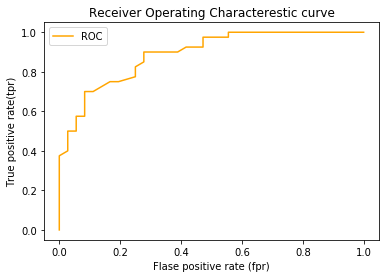

In [141]:
import matplotlib.pyplot as plt
# create function for ROC curve
def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr)
    and true positive rate(tpr) of a model.
    """
    # Plot roc curve 
    plt.plot(fpr, tpr, color='orange', label='ROC')
    
    # customize the plot 
    plt.xlabel('Flase positive rate (fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title('Receiver Operating Characterestic curve')
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [145]:
from sklearn.metrics import roc_auc_score
# non perfect roc_curve 
area = roc_auc_score(y_test, positive_y_probs)

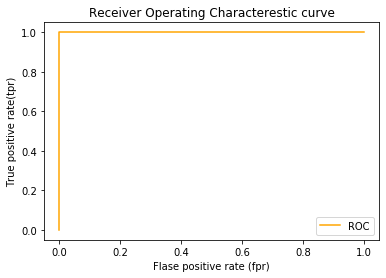

1.0

In [146]:
# perfect roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)

plot_roc_curve(fpr, tpr)

area = roc_auc_score(y_test, y_test)
area

**Confusion Matrix**

A confusion matrix is a quick way to compare a model predicts and the actual label it was supposed to predict.
in essence, giving you an idea of where the model is getting confused. 

In [150]:
# import confusion matrix
from sklearn.metrics import confusion_matrix

# use predicts for x_test
y_preds = model.predict(x_test)

# use confusion matrix
confusion_matrix(y_test, y_preds)

array([[26, 10],
       [ 5, 35]])

In [151]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['actual label'], colnames=['predicted label'])

predicted label,0,1
actual label,,
0,26,10
1,5,35


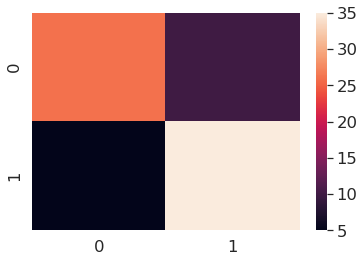

In [154]:
# Make our confusion matrix more visualize with seaborn's heatmap()
import seaborn as sns

# set the font scale of seaborn
sns.set(font_scale=1.5)

# create a confusion matrix 
conf_matrix = confusion_matrix(y_test, y_preds)

# plotting using seaborn
sns.heatmap(conf_matrix)